In [51]:
%matplotlib inline

In [52]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [53]:
from sklearn.tree import DecisionTreeClassifier

from sklearn.feature_extraction.text import CountVectorizer  #DT does not take strings as input for the model fit step....

In [54]:
credit_df = pd.read_csv("credit.csv")

In [55]:
credit_df.info()  # many columns are of type object i.e. strings. These need to be converted to ordinal type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
checking_balance        1000 non-null object
months_loan_duration    1000 non-null int64
credit_history          1000 non-null object
purpose                 1000 non-null object
amount                  1000 non-null int64
savings_balance         1000 non-null object
employment_duration     1000 non-null object
percent_of_income       1000 non-null int64
years_at_residence      1000 non-null int64
age                     1000 non-null int64
other_credit            1000 non-null object
housing                 1000 non-null object
existing_loans_count    1000 non-null int64
job                     1000 non-null object
dependents              1000 non-null int64
phone                   1000 non-null object
default                 1000 non-null object
dtypes: int64(7), object(10)
memory usage: 132.9+ KB


In [56]:
# Decision tree in Python can take only numerical / categorical colums. It cannot take string / obeject types. 
# The following code loops through each column and checks if the column type is object then converts those columns
# into categorical with each distinct value becoming a category or code.

for feature in credit_df.columns: # Loop through all columns in the dataframe
    if credit_df[feature].dtype == 'object': # Only apply for columns with categorical strings
        credit_df[feature] = pd.Categorical(credit_df[feature]).codes # Replace strings with an integer

In [57]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
checking_balance        1000 non-null int8
months_loan_duration    1000 non-null int64
credit_history          1000 non-null int8
purpose                 1000 non-null int8
amount                  1000 non-null int64
savings_balance         1000 non-null int8
employment_duration     1000 non-null int8
percent_of_income       1000 non-null int64
years_at_residence      1000 non-null int64
age                     1000 non-null int64
other_credit            1000 non-null int8
housing                 1000 non-null int8
existing_loans_count    1000 non-null int64
job                     1000 non-null int8
dependents              1000 non-null int64
phone                   1000 non-null int8
default                 1000 non-null int8
dtypes: int64(7), int8(10)
memory usage: 64.5 KB


col_labels = [ 'checking_balance', 'months_loan_duration' ,'credit_history' , 'purpose, amount', 'savings_balance' , 'employment_duration'
, 'percent_of_income', 'years_at_residence', 'age', 'other_credit', 'housing', 'existing_loans_count', 'job', 'dependents', 'phone', 'default']

train_char_label = ['No', 'Yes']

In [58]:
# splitting data into training and test set for independent attributes

#train_set = credit_df.head(500) # Up to the last initial training set row
#test_set = credit_df.tail(500) # Past the last initial training set row

# capture the target column ("default") into separate vectors for training set and test set
#train_labels = train_set.pop("default")
#test_labels = test_set.pop("default")


array = credit_df.values
X = array[:,:-1] # select all rows and first 4 columns which are the attributes
y = array[:,-1] 

train_set, test_set, train_labels, test_labels = train_test_split(X, y, test_size=0.25, random_state=1)

In [59]:
# invoking the decision tree classifier function. Using 'entropy' method of finding the split columns. Other option 
# could be gini index.  Restricting the depth of the tree to 5 (no particular reason for selecting this)

#dt_model = DecisionTreeClassifier(criterion = 'entropy' , max_depth = 5, random_state = 100)
                                  
dt_model = DecisionTreeClassifier(criterion = 'entropy' , random_state=1)

In [60]:
dt_model.fit(train_set, train_labels )

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

In [61]:
dt_model.score(test_set , test_labels)

0.712

In [62]:
dt_model.score(train_set, train_labels)   # to demonstrate that it is overfit

1.0

Regularising the Decision Tree

In [63]:
dt_model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5, random_state=1 )
dt_model.fit(train_set, train_labels)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

In [64]:
print("Regularized DT is right fit    ")

print(dt_model.score(train_set , train_labels))

print(dt_model.score(test_set , test_labels))

Regularized DT is right fit    
0.7506666666666667
0.708


# Ensemble Learning 

## Bagging

In [65]:
credit_labels = credit_df.pop("default")

In [88]:
# In the following lines, we call the bagging classifer with oob_score (out of bag score) set to true which false by default
# This makes the baggingclassifier use the 37% unused data for testing
# Compare the performance of the BGCL with regularized dt above. 
# Though not required, you can keep separate test data (outside the bootstrap sampling) on which we test the BGCL
# 

from sklearn.ensemble import BaggingClassifier
bgcl = BaggingClassifier(n_estimators=100, max_samples=.50 , oob_score=True)

bgcl = bgcl.fit(credit_df, credit_labels)

print(bgcl.oob_score_)

0.764


## AdaBoosting

In [85]:
from sklearn.ensemble import AdaBoostClassifier

abcl = AdaBoostClassifier(n_estimators=50)
abcl = abcl.fit(train_set, train_labels)


In [86]:
# print(abcl.oob_score_)   # Adaboost does not have OOB Score attribute

test_pred = abcl.predict(test_set)
abcl.score(test_set , test_labels)

0.728

## GradientBoost

In [69]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50, random_state=1)
gbcl = gbcl.fit(train_set, train_labels)

In [70]:
# print(gbcl.oob_score_)   # Gradientboost does not have OOB Score attribute


test_pred = gbcl.predict(test_set)
gbcl.score(test_set , test_labels)

0.736

## RandomForest Classifier

In [71]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50, random_state=1)
rfcl = rfcl.fit(train_set, train_labels)

In [72]:
# To keep it comparable with boosting algorithms... it supports oob score

test_pred = rfcl.predict(test_set)
rfcl.score(test_set , test_labels)

0.756

# ROC AUC for Ensemble

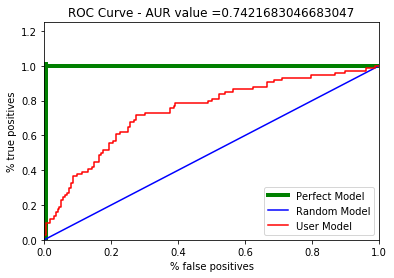

In [89]:
#importing libraries
import numpy as np
import pandas as pd
from matplotlib import cm
import matplotlib.pyplot as plt
from sklearn import metrics



def roccurve(y_values, y_preds_proba):
    fpr, tpr, _ = metrics.roc_curve(y_values, y_preds_proba)
    xx = np.arange(101) / float(100)
    aur = metrics.auc(fpr,tpr)
    plt.xlim(0, 1.0)
    plt.ylim(0, 1.25)
    plt.plot([0.0, 0.0], [0.0, 1.0], color='green', linewidth=8)
    plt.plot([0.0, 1.0], [1.0, 1.0], color='green', label='Perfect Model', linewidth=4)
    plt.plot(xx,xx, color='blue', label='Random Model')
    plt.plot(fpr,tpr, color='red', label='User Model')
    plt.title("ROC Curve - AUR value ="+str(aur))
    plt.xlabel('% false positives')
    plt.ylabel('% true positives')
    plt.legend()
    plt.show()




#rfcl_test_pred_proba = bgcl.predict_proba(X=test_set)
#roccurve(y_values=test_labels, y_preds_proba=rfcl_test_pred_proba[:,1])

bgcl_test_pred_proba = bgcl.predict_proba(X=test_set)
roccurve(y_values=test_labels, y_preds_proba=rfcl_test_pred_proba[:,1])



In [98]:
#Long Term performance on OOB data rather than a separate dataset
bgcl = BaggingClassifier(n_estimators=500, max_samples=.50 , oob_score=True)

values = credit_df.values  # This is already done, showing it here for ease of reference



# configure bootstrap
n_iterations = 100       # Number of bootstrap samples to create
n_size = int(len(values) * 1)    # picking only 50 % of the given data in every bootstrap sample

# run bootstrap
stats = list()
for i in range(n_iterations):

	bgcl.fit(values[:,:-1], values[:,-1])
	score = bgcl.oob_score_
	#print(score)
	stats.append(score)


In [96]:
abcl = AdaBoostClassifier(n_estimators=50)
# configure bootstrap
n_iterations = 100       # Number of bootstrap samples to create
n_size = int(len(values) * 1)    # picking only 50 % of the given data in every bootstrap sample
# run bootstrap
stats = list()
for i in range(n_iterations):
    abcl = abcl.fit(train_set, train_labels)
    test_pred = abcl.predict(test_set)
    Score=abcl.score(test_set , test_labels)
    #print(Score)
    stats.append(Score)

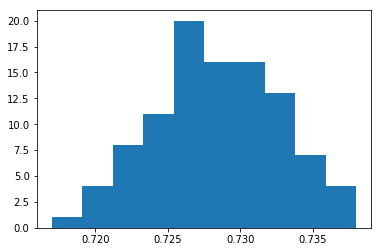

95.0 confidence interval 72.0% and 73.6%


In [99]:
from matplotlib import pyplot

# plot scores
pyplot.hist(stats)
pyplot.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(stats, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))